## Run this cell first
Do not worry about the DepreciationWarning in the pink box, or the message about Planet data processing.

In [15]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200
import sys
sys.path.append(r"/opt/pyeo")
sen2cor_path = r"/opt/Sen2Cor-02.05.05-Linux64/bin/L2A_Process"
import pyeo.core as pyeo
import matplotlib.pyplot as plt
import gdal
import pprint

pyeo.init_log("training_log.log")

def show_satellite_image(image_path):
    img = gdal.Open(image_path)
    array = img.GetVirtualMemArray()
    if len(array.shape) == 3:
        img_view = array.transpose([1,2,0])
    else:
        img_view = array
    plt.imshow(img_view)
    array = None
    img = None

2019-04-10 21:15:36,870: INFO: ****PROCESSING START****


## Useful to know:

* For quick help on any Python function, run the line 

```python
?function_name
```
in a cell.
To see this in action, try 
```python
?pyeo.download_s2_data
```
* While you type, you can press Tab to get a list of possible completions.


## Step 0: Sign up to the Copernicus OA hub
If you have not done so, go to https://scihub.copernicus.eu/ and create a username and password.

Fill in the first two lines of kinangop.ini with these.

## Step 1: Load the configuration file



This step uses the Python modle ConfigParser.

A Configuration File is a way of recording a set of values such that Python can understand them.

If you run the below cell, you should see your Scihub username appear.


In [5]:
import configparser    # Imports the module
conf = configparser.ConfigParser()    # Creates a ConfigParser object
conf.read("kinangop.ini")     # Reads the images 
print(conf['sent_2']['user'])    # Gets a specific part of the configuration file

jfr10


 ## Step 2: Choose and download images
Open up kinangop_rough.json and have a look. To see the area mapped, open www.geojson.io and paste the contents of the file; you should see the polygon.

We will be using a high-level Pyeo function for this part of the practical:
```Python
query_results = pyeo.check_for_s2_data_by_date(
    "path/to/json",
    date_1,
    date_2,
    conf,
    maximum_cloud_cover)
```
This function searches for Sentinel 2 data between the given dates, tells you how many

All dates and values are passed as strings.

Each date is in the format "yyyymmdd"; for example, the 14th February, 2016 would be "20160214".

The cloud cover is in percent; setting this to '50' would find 

`conf` is the object you made in step 1.

For example, to check for images in **Kinangop** between **25th December, 2017** and **1st of January, 2018** with less than **30%** cloud cover, you would do this:

```python
query_results = pyeo.check_for_s2_data_by_date(
    "kinangop_rough.json",
    "20171225",
    "20180101",
    conf,
    "30"
)
```

You can see the results with ```pprint.pprint(query_results)```

pyeo.download_s2_data()
takes the results from check_for_s2_data_by_date() and downloads the images from either Scihub or AWS.
For this excersise, we will use Scihub; it requres the least setup.

**NOTE: There were API problems here. Scihub wasn't letting people in; seemed to resolve itself later.**



## Exercise 1: Search for all images in the first week of January 2019 with less than 60% cloud cover


In [6]:
query_results = pyeo.check_for_s2_data_by_date("kinangop_rough.json", "20190101", "20190107", conf, "60")


2019-04-10 11:12:23,390: INFO: Querying for imagery between 20190101 and 20190107 for aoi kinangop_rough.json
2019-04-10 11:12:23,393: INFO: Sending query:
footprint: POLYGON((36.6123 -0.5949,36.6293 -0.6657,36.6627 -0.7148,36.6859 -0.7013,36.6863 -0.7012,36.6867 -0.7009,36.6948 -0.6807,36.6895 -0.6439,36.6894 -0.6436,36.6778 -0.6129,36.6540 -0.5556,36.6216 -0.5369,36.6123 -0.5949))
start_date: 2019-01-01T00:00:00Z
end_date: 2019-01-07T00:00:00Z
 cloud_cover: 60 
2019-04-10 11:12:24,936: INFO: Search returned 2 images


NameError: name 'pr' is not defined

In [7]:
pprint.pprint(query_results)

OrderedDict([('0c344e78-d831-4992-9156-1baf8b95715e',
              {'beginposition': datetime.datetime(2019, 1, 4, 7, 43, 19, 24000),
               'cloudcoverpercentage': 59.354899,
               'endposition': datetime.datetime(2019, 1, 4, 7, 43, 19, 24000),
               'filename': 'S2B_MSIL2A_20190104T074319_N0211_R092_T36MZE_20190104T105348.SAFE',
               'footprint': 'POLYGON ((35.95384246679841 '
                            '-0.992036981720296,35.98050947388588 '
                            '-0.874926320967075,36.01400330498628 '
                            '-0.726540394081699,36.04613863390302 '
                            '-0.577680769422582,36.077786416000926 '
                            '-0.428634387602278,36.11079620231406 '
                            '-0.280128952066875,36.14387615484576 '
                            '-0.131729223621118,36.172306661780844 '
                            '0,36.68003945693003 0,36.68058743420844 '
                            '-0.

## Step 3: Download the images you found in step 2

The Pyeo function ```pyeo.download_s2_data()``` takes the results from check_for_s2_data_by_date() and downloads the images from either Scihub or AWS. You call it like this:

```python
pyeo.download_s2_data(
    new_data,
    out_folder,
    source='scihub',
    user=your_username,
    passwd=your_password,
)
```

```new_data``` is the output from step 1.

```out_folder``` is the directory that the images will be downloaded to.

```source``` is the source of the data; at present, download_s2_data supports the Copernicus hub (```"scihub"```) and the public AWS S2 dataset (```"aws"```) as it's source.
Work for supporting Google Cloud is ongoing.

```user``` and ```passwd``` are your Copernicus username and password, that you created in step 0.

It is bad practice to have your password typed into your script. You should store it in a file and load it when needed.

With that in mind, you can extract your username and password from ```conf``` by using the following snippet:
```python
user = conf["sent_2"]["user"]
passwd = conf["sent_2"]["pass"]
```

## Exercise 2: Create a new folder called "images". Download the sentinel 2 products from step 2 into this folder.
You will need to create this folder in the Jupyter browser that you opened this notebook from.

In [21]:
pyeo.download_s2_data(query_results, "images", source = "scihub", user = conf["sent_2"]["user"], passwd = conf["sent_2"]["pass"])

2019-04-10 08:49:54,820: INFO: {} is not a valid L1 file
2019-04-10 08:49:54,821: INFO: Downloading S2B_MSIL2A_20190104T074319_N0211_R092_T36MZE_20190104T105348 from scihub
2019-04-10 08:49:54,822: INFO: Downloading 0c344e78-d831-4992-9156-1baf8b95715e from scihub
Downloading: 100%|██████████| 715M/715M [03:50<00:00, 3.52MB/s] 
MD5 checksumming: 100%|██████████| 715M/715M [00:01<00:00, 426MB/s] 
2019-04-10 08:53:49,103: INFO: Unzipping images/S2B_MSIL2A_20190104T074319_N0211_R092_T36MZE_20190104T105348.zip to images
2019-04-10 08:53:51,031: INFO: Removing images/S2B_MSIL2A_20190104T074319_N0211_R092_T36MZE_20190104T105348.zip
2019-04-10 08:53:51,117: INFO: {} is not a valid L1 file
2019-04-10 08:53:51,118: INFO: Downloading S2B_MSIL1C_20190104T074319_N0207_R092_T36MZE_20190104T095459 from scihub
2019-04-10 08:53:51,119: INFO: Downloading 4f0740d4-4eb3-48d8-96ab-3e470ca8e262 from scihub
Downloading: 100%|██████████| 528M/528M [01:50<00:00, 3.37MB/s] 
MD5 checksumming: 100%|██████████| 5

## Step 4: Explore and view your image 

Open up your "images" folder; you should see some folders ending in .SAFE. These are your sentinel 2 L1 images.

Normally, you would open up a program like QGis or ArcGIS to view these images. In this context, that is not possible so instead use the following snippet of code to view an image:

```python
%matplotlib inline
show_satellite_image(image_path)
```

## Exercise 3: View the quicklook of both your images

In each .SAFE file, there is a RGB image that acts as a low-resolution preview. This file ends with TCL.jp2. Search through each of your .SAFE files and find the path to it, then use the above snippet to display it.

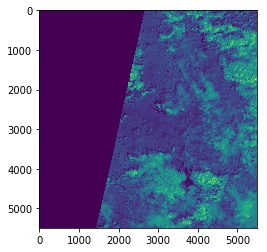

In [16]:
%matplotlib inline
foo = "images/S2B_MSIL1C_20190104T074319_N0207_R092_T36MZE_20190104T095459.SAFE/GRANULE/L1C_T36MZE_A009556_20190104T075257/IMG_DATA/T36MZE_20190104T074319_TCI.jp2"
show_satellite_image("images/S2B_MSIL1C_20190104T074319_N0207_R092_T36MZE_20190104T095459.SAFE/GRANULE/L1C_T36MZE_A009556_20190104T075257/IMG_DATA/T36MZE_20190104T074319_B8A.jp2")

## Step 5: Pre-process to Level 2 data

At present, the images you have downloaded are not accurate - they do not take the effects of the atmosphere into account. ESA provide an out-of-the-box program, Sen2Cor, to correct this.

Sen2Cor is normally called from the command line, but Pyeo provides a function to automate this.
```python
l2_path = pyeo.apply_sen2cor(
    image_path,
    sen2cor_path
)
```

This function calls L2A_Process (the relevent part of sen2cor) on the .SAFE file at image_path. It produces a level 2 .SAFE file at the same location.

You _could_ call pyeo.apply_sen2cor on each of your images in turn, by hand. This is fine if you only have a few images, but will get tedious very quickly for 100.

You can use the following snippet to get the name of every file in your directory in a list.

```python
import os
file_list = os.listdir("my/folder")
```

In the same vein, you can use the following snippet to call the 'print' function for every item of a list.

```python
for file in file_list:
    print(file)
```


## Exercise 4: Preprocess the images you downloaded.

This will take around 30 minutes per image. Modify the second snippet to call apply_sen2cor to each .SAFE file you have downloaded.



In [24]:
import os
file_list = os.listdir("images")
for file in file_list:
    path = os.path.join("images", file)
    pyeo.apply_sen2cor(path, sen2cor_path)

2019-04-10 09:51:57,280: INFO: calling subprocess: ['/opt/Sen2Cor-02.05.05-Linux64/bin/L2A_Process', 'images/S2B_MSIL1C_20190104T074319_N0207_R092_T36MZE_20190104T095459.SAFE']
2019-04-10 09:51:59,583: INFO: Processing baseline 02.1 is not implemented yet.

2019-04-10 09:51:59,585: INFO: Product version 14.5 will be used but errors during processing might occur.

2019-04-10 09:51:59,657: INFO: 

2019-04-10 09:51:59,658: INFO: Sentinel-2 Level 2A Processor (Sen2Cor). Version: 2.5.5, created: 2018.03.19, supporting Level-1C product version <= 14.5 started ...

2019-04-10 09:51:59,663: INFO: Product version: 14.5. Operation mode: PDGS. Processing baseline: 02.07.

2019-04-10 09:52:01,410: INFO:  No resolution specified, will process all resolutions.

2019-04-10 09:52:01,812: INFO: Progress[%]: 0.02 : PID-31291, L2A_ProcessTile: processing with resolution 60 m, elapsed time[s]: 0.408, total: 0:00:02.515964

2019-04-10 09:52:01,813: INFO: Progress[%]: 0.02 : PID-31291, L2A_ProcessTile: star

2019-04-10 09:54:07,870: INFO: Progress[%]: 4.96 : PID-31291, L2A_AtmCorr: start of water vapour retrieval, elapsed time[s]: 0.001, total: 0:02:08.573694

2019-04-10 09:54:08,497: INFO: Progress[%]: 4.98 : PID-31291, L2A_AtmCorr: end of water vapour retrieval preparation, elapsed time[s]: 0.627, total: 0:02:09.200861

2019-04-10 09:54:29,462: INFO: Progress[%]: 5.81 : PID-31291, L2A_AtmCorr: end of water vapour retrieval, elapsed time[s]: 20.966, total: 0:02:30.166876

2019-04-10 09:54:29,464: INFO: Progress[%]: 5.81 : PID-31291, L2A_AtmCorr: preparation of surface reflectance retrieval, elapsed time[s]: 0.000, total: 0:02:30.167285

2019-04-10 09:54:34,179: INFO: Progress[%]: 5.99 : PID-31291, L2A_AtmCorr: end of surface reflectance retrieval preparation, elapsed time[s]: 4.717, total: 0:02:34.883822

2019-04-10 09:54:55,887: INFO: Progress[%]: 6.84 : PID-31291, L2A_AtmCorr: end of surface reflectance retrieval, elapsed time[s]: 21.707, total: 0:02:56.591282

2019-04-10 09:55:02,423: 

2019-04-10 09:57:59,633: INFO: Progress[%]: 14.05 : PID-31291, L2A_CSND_6    , elapsed time[s]: 2.717, total: 0:06:00.337064

2019-04-10 09:58:01,365: INFO: Progress[%]: 14.12 : PID-31291, L2A_CSND_6_2  , elapsed time[s]: 1.733, total: 0:06:02.069693

2019-04-10 09:58:03,300: INFO: Progress[%]: 14.19 : PID-31291, L2A_CSND_7    , elapsed time[s]: 1.934, total: 0:06:04.003986

2019-04-10 09:58:54,529: INFO: Progress[%]: 16.20 : PID-31291, L2A_SHD       , elapsed time[s]: 51.230, total: 0:06:55.233581

2019-04-10 09:58:56,669: INFO: Progress[%]: 16.28 : PID-31291, DV recovery   , elapsed time[s]: 2.140, total: 0:06:57.373304

2019-04-10 09:58:58,960: INFO: Progress[%]: 16.37 : PID-31291, WP recovery   , elapsed time[s]: 2.291, total: 0:06:59.664136

2019-04-10 09:58:58,961: INFO: Progress[%]: 16.37 : PID-31291, WP recovery with CCI Water Bodies at 150m  , elapsed time[s]: 0.002, total: 0:06:59.665890

2019-04-10 09:59:01,652: INFO: Progress[%]: 16.48 : PID-31291, Snow recovery , elapsed t

2019-04-10 10:11:41,490: INFO: Progress[%]: 46.28 : PID-31291, L2A_Tables: band AOT imported, elapsed time[s]: 16.731, total: 0:19:42.194738

2019-04-10 10:12:01,460: INFO: Progress[%]: 47.06 : PID-31291, L2A_Tables: band WVP imported, elapsed time[s]: 19.970, total: 0:20:02.164630

2019-04-10 10:12:18,138: INFO: Progress[%]: 47.72 : PID-31291, L2A_Tables: band VIS imported, elapsed time[s]: 16.677, total: 0:20:18.841904

2019-04-10 10:12:35,639: INFO: Progress[%]: 48.40 : PID-31291, L2A_Tables: band SCL imported, elapsed time[s]: 17.501, total: 0:20:36.343048

2019-04-10 10:12:35,651: INFO: Progress[%]: 48.40 : PID-31291, L2A_ProcessTile: start of Atmospheric Correction, elapsed time[s]: 0.013, total: 0:20:36.355590

2019-04-10 10:12:45,928: INFO: Progress[%]: 48.80 : PID-31291, L2A_AtmCorr: end of calculation terrain maps, elapsed time[s]: 10.277, total: 0:20:46.632826

2019-04-10 10:12:45,930: INFO: Progress[%]: 48.80 : PID-31291, L2A_AtmCorr: start of resampling visibility for 10 m

In [17]:
?pyeo.atmospheric_correction

## Further work

We will continue with the main processing chain tomorrow. If you have reached this point, try the following exercises:

* The following snippet uses GDAL to open an image.

```python
import gdal
image = gdal.Open("path/to/image")
```

There is a Python concept known as an 'object'. An 'object' contains a set of 'methods' (things the object can do) and 'attributes' (values that define what the object is).

From the above snippet, `image` is an object containing methods and attributes. To get a list of these methods and attributes, use the command dir(image). To call them, use image.function() or image.attribute

### Using gdal.Open, find out the height, width and number of bands in the quicklook.

* ```array = image.ReadAsArray()``` lets you open an image as a Numpy array. This lets you inspect the pixels directly.
  
  A Gdal image array is of the order (bands, y, x), so to access the pixel at **x=100**, **y = 500** of the **1st band**, you would use 
  ```python
  array[0, 499, 99]
  ```
  
  Python (and most other languages) count from 0 for this, so the first band has an index of 0, the second band has an index of 1 and so on.

### Using the examples at https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html, find the mean pixel value of each band of your quicklook.
